In [7]:
%pip install scikit-learn

  Using cached scikit_learn-1.5.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.14.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 1.0 MB/s eta 0:00:00m eta 0:00:01 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 3.6 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 1.2 MB/s eta 0:00:00m eta 0:00:010:00:010m

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn


In [2]:
data = pd.read_csv('crop.csv')

print(data.head())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [3]:
print(data.dtypes)

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object


In [4]:
# Exploratory Data Analysis (EDA)
print(data.describe())

                 N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117  


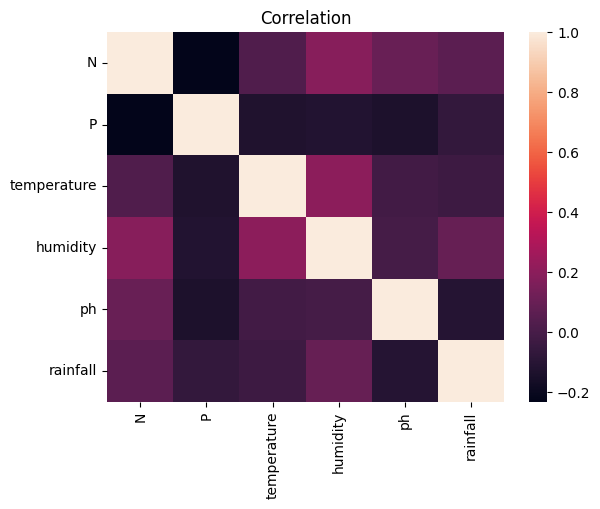

In [5]:
# Correlation, relationship between columns
c =data.label.astype('category')
targets = dict(enumerate(c.cat.categories))
data['target'] = c.cat.codes

y = data.target
X = data[['N', 'P', 'temperature','humidity','ph','rainfall']]

sns.heatmap(X.corr())
plt.title("Correlation")
plt.show()

In [6]:
# Data Pre-processing for ML module

# Machine learning models, set train and test data

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply the scaling to the test set as well so that we compute for the training set
X_test_scaled = scaler.transform(X_test)

In [7]:
# Selection of model- KNN, Confusion Matrix, Random Forest, 
# Use classification llike SVM, Decision Trees

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)



0.9568181818181818

In [8]:
# Try with Confusion Matrix

from sklearn.metrics import confusion_matrix

mat = confusion_matrix(y_test, knn.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, index=[i for i in targets.])

SyntaxError: invalid syntax (1362138169.py, line 6)

In [ ]:
# knn



In [9]:
# Classification using Support Vector Classifier

from sklearn.svm import SVC

svc_linear = SVC(kernel='linear')
svc_linear.fit(X_train_scaled, y_train)
svc_linear.score(X_test_scaled, y_test)
print('Linear Kernel Accuracy: ',svc_linear.score(X_test_scaled, y_test))

svc_poly = SVC(kernel='poly')
svc_poly.fit(X_train_scaled, y_train)
svc_poly.score(X_test_scaled, y_test)
print('Poly kernel Accuracy: ',svc_poly.score(X_test_scaled, y_test))

svc_poly = SVC(kernel='rbf')
svc_poly.fit(X_train_scaled, y_train)
svc_poly.score(X_test_scaled, y_test)
print('RBF kernel Accuracy: ',svc_poly.score(X_test_scaled, y_test))


Linear Kernel Accuracy:  0.9340909090909091
Poly kernel Accuracy:  0.9795454545454545
RBF kernel Accuracy:  0.975


In [10]:
# Highlights
# 1. Poly kernel has a small margin accuracy score than the RBF

In [11]:
# Classify using decision trees
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.DecisionTreeClassifier
dt.


SyntaxError: invalid syntax (3975285220.py, line 6)

In [ ]:
# Random forest

from sklearn.ensemble import  RandomForestClassifier

dt = RandomForestClassifier()

In [ ]:
# Machine Learning

"""
Split data into 3 categories
1. Numerical
2. Categorical
3. Ordinal
"""

# Numeical data

# Linear regression(relationship btn variables)
# This uses the relationship btn data points




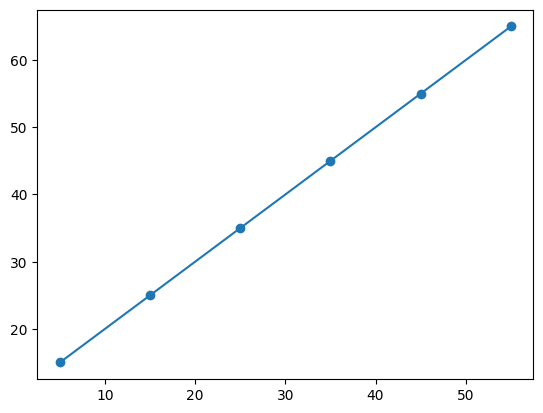

In [12]:
from scipy import stats

x= [5,15, 25, 35, 45, 55]
y= [15, 25, 35, 45, 55, 65]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

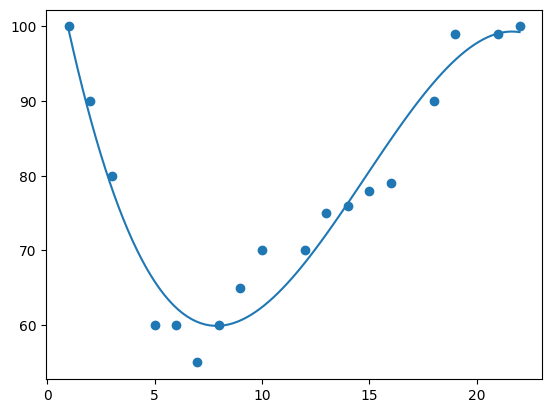

In [13]:
x = [1,2,3,5,6,7,8,9,10,12,13,14,15,16,18,19,21,22]
y = [100,90,80,60,60,55,60,65,70,70,75,76,78,79,90,99,99,100]

mymodel = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 22, 100)

plt.scatter(x, y)
plt.plot(myline, mymodel(myline))
plt.show()